In [4]:
import pandas as pd
heart_attack_data = pd.read_csv('C:\sem-8\Datasets\heart_attack.csv')
heart_attack_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
heart_attack_data.shape

(918, 12)

In [9]:
heart_attack_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
heart_attack_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
heart_attack_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
#selecting columns for subset
subset = heart_attack_data[["Age","Cholesterol","MaxHR"]]
subset.head()

,Age,Cholesterol,MaxHR
0,40,289,172
1,49,180,156
2,37,283,98
3,48,214,108
4,54,195,122


In [16]:
subset.describe()

,Age,Cholesterol,MaxHR
count,918.000000,918.000000,918.000000
mean,53.510893,198.799564,136.809368
std,9.432617,109.384145,25.460334
min,28.000000,0.000000,60.000000
25%,47.000000,173.250000,120.000000
50%,54.000000,223.000000,138.000000
75%,60.000000,267.000000,156.000000
max,77.000000,603.000000,202.000000


In [18]:
import matplotlib.pyplot as plt

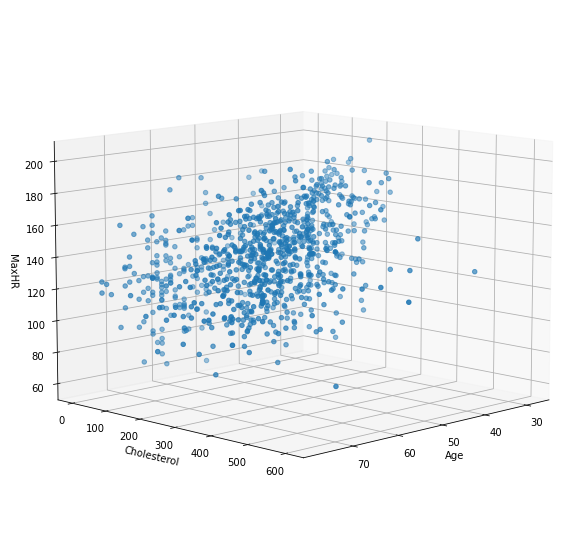

In [19]:
graph = plt.figure(figsize=(10,10)).gca(projection='3d')
col1, col2, col3 = 'Age', 'Cholesterol', 'MaxHR'

graph.scatter(subset[col1], subset[col2], subset[col3])
graph.set_xlabel(col1)
graph.set_ylabel(col2)
graph.set_zlabel(col3)
graph.view_init(10, 45)
plt.show()

C:\Users\prati\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


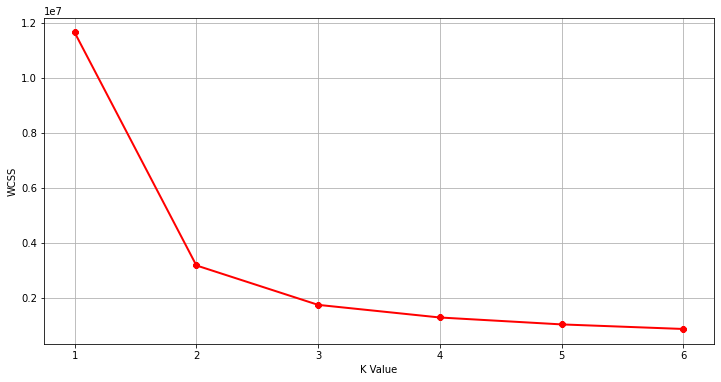

In [20]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

wcss = []
for k in range(1,7):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(subset)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,7),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,7,1))
plt.ylabel("WCSS")
plt.show()

<ipython-input-21-bedf4623779b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["label"] = clusters


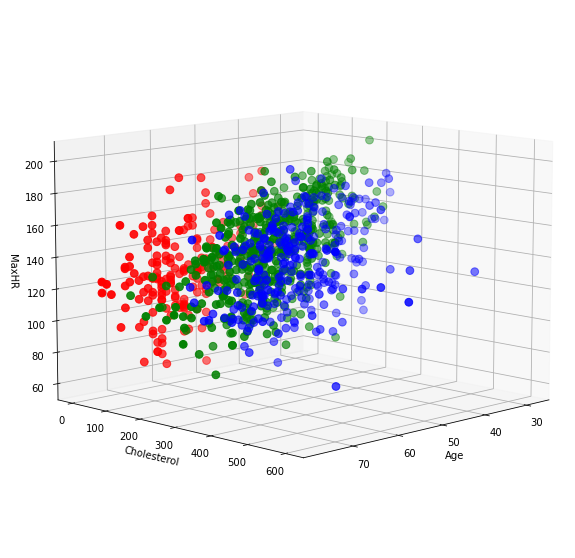

In [21]:
from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=3)
clusters = km.fit_predict(subset)
subset["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(subset[col1][subset.label == 0], subset[col2][subset.label == 0], subset[col3][subset.label == 0], c='blue', s=60)
ax.scatter(subset[col1][subset.label == 1], subset[col2][subset.label == 1], subset[col3][subset.label == 1], c='red', s=60)
ax.scatter(subset[col1][subset.label == 2], subset[col2][subset.label == 2], subset[col3][subset.label == 2], c='green', s=60)

ax.view_init(10, 45)
plt.xlabel(col1)
plt.ylabel(col2)
ax.set_zlabel(col3)
plt.show()